# Exercise 1: reading FASTA files

The [FASTA](http://en.wikipedia.org/wiki/FASTA_format)-format is a text-based format for nucleotide and protein sequences. A FASTA File begins with a single line description which is indicated by a leading ">".

Example:

> \>gi|31563518|ref|NP_852610.1| microtubule-associated proteins 1A/1B light chain 3A isoform b [Homo sapiens] MKMRFFSSPCGKAAVDPADRCKEVQQIRDQHPSKIPVIIERYKGEKQLPVLDKTKFLVPDHVNMSELVKIIRRRLQLNPTQAFFLLVNQHSMVSVSTPIADIYEQEKDEDGFLYMVYASQETFGFIRENE

* parse the nucleotide sequence in the file `GPD1_seq.fasta` (omit the description line)
* write a function `compute_nt_composition( sequence )`, which returns a dictionary containing the number of ocurrences for each base in a given sequence
* compute the nucleotide composition of the GDP1 protein and pickle the result to a file


In [72]:
import cPickle as pickle

with open('GPD1_seq.fasta', 'r') as f:
    f_str=f.readlines()

sequence=''

for line in f_str:
    if line.startswith('>'):
        continue
    sequence=sequence+line.strip()
    
sequence

def compute_nt_composition(sequence):
    base=['A','T','G','C']
    dic={}
    for i in base:
        dic[i]=sequence.count(i)
    return dic

result=compute_nt_composition(sequence)

with open('nuc_comp.p', 'w') as f:
    pickle.dump(result,f)

    



    

# Exercise 2: Plot a histogram

take the nucleotide composition of the gene above and plot a histogram of the A, T, G and C frequency. Have your histogram labeled nicely and give it a title. Please, choose yourself if you would like to display horizontal or vertical bars. Advanced options include change of color for individual bars, width of the bars and alignment of labels and bars.

([<matplotlib.axis.XTick at 0x7f4ea82283d0>,
 <a list of 4 Text xticklabel objects>)

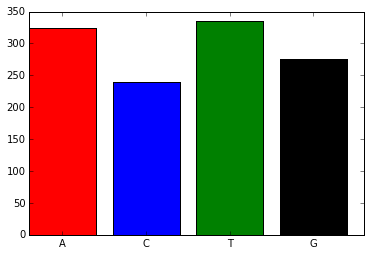

In [46]:
%matplotlib inline 
from pylab import *

with open('nuc_comp.p', 'r') as f:
    data=pickle.load(f)

keys=data.keys()
values=data.values()
#base=['A','T','G','C']
bar(range(len(keys)),values,width=0.8,color=['r','b','g','k'])
xticks(np.array(range(len(keys)))+0.4,keys)



    

# Exercise 3: Plot a scatterplot

The file `mycoplasma_gene_sequences.csv` contains the genomic sequences of all *Mycoplasma genitalium* genes. The file contains two columns separated by a coma, the `WholeCellModelID` and the `Sequence`. 

* Read and parse the file and compute the nucleotide composition for each gene using the `compute_nt_composition( seq )` function that you have defined in Exercise 1. Collect the nucleotide compositions f Then use the scatter function to plot a scatterplot of A content versus T content for each gene (don't forget to normalize the nucleotide content by gene length).

* Indicate the length of each sequence by the dot-size in the scatterplot (hint: s input of scatter function)

* Plot the scatterplot for each combination of A,G,T,C (use subplot)

Using matplotlib backend: TkAgg


526

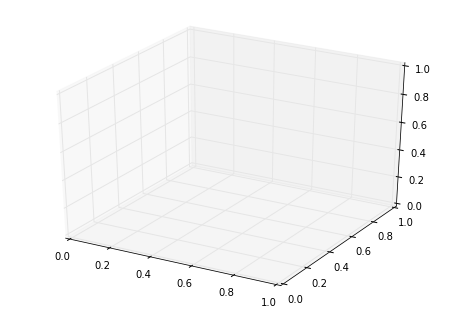

In [102]:
import pandas as pd

data=pd.read_csv('mycoplasma_gene_sequences.csv')
base=['A','T','G','C']
genes=[]
compositions=[]
for i in data.WholeCellModelID.values:
    genes.append(i)
for i in data.Sequence.values:
    compositions.append(compute_nt_composition(str(i)))
    
from mpl_toolkits.mplot3d import Axes3D
%matplotlib
close('all')
fig=figure(); ax = Axes3D(fig)

A=[sum(i['A']) for i in compositions]
T=[sum(i['T']) for i in compositions]
len(genes)


    
    
    
    

# Exercise 4: Plot the phasespace

in the numpy tutorial yesterday, you examined how a population of predator and prey can evolve over time theoretically (Lotka-Voltera System). Today, revisit the system and plot the phase space of the two species. In a phase space we plot the two variables against each other. 

In a next step, imagine, we would like to visualize how different starting conditions impact population behavior. Try having different conditions in the same phase space plot.

In [1]:
import scipy.integrate